<a href="https://colab.research.google.com/github/yedini/DL_tensorflow/blob/main/Part4_Lab01_RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##RNN basics     


In [ ]:
# setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

print(tf.__version__)


2.5.0


In [ ]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

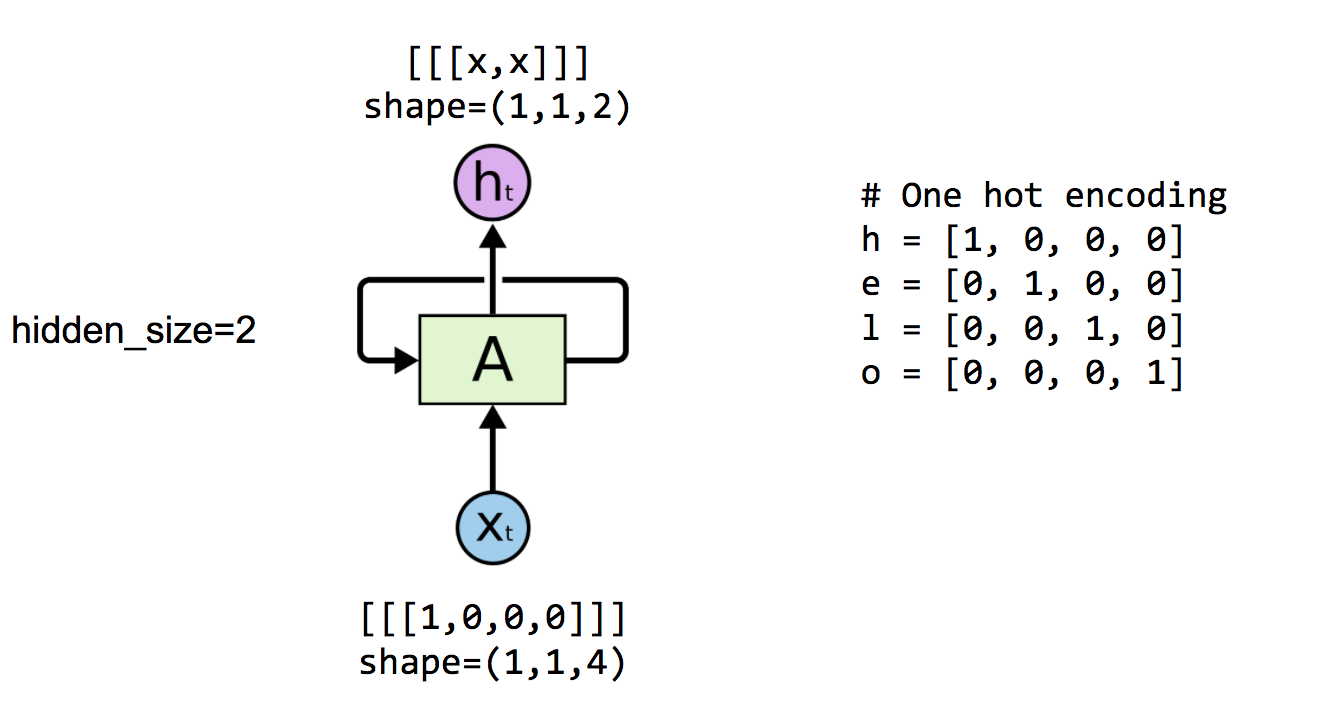
     
- 첫번째 input data [1,0,0,0]이 들어갈 때 shape (1,1,4) : 각각 batch size, sequence length(나열할 RNN 개수), input dimension임.
- state: 옆으로 이동해서 영향을 줄 state 값

In [ ]:
# One cell RNN input_dim (4) -> output_dim (2)
x_data = np.array([[h]], dtype=np.float32) #h에 해당하는 one hot vector를 입력하고, RNN이 처리할 수 있도록 전처리

hidden_size = 2  # hidden size 개수는 자유
cell = layers.SimpleRNNCell(units=hidden_size) # creating SimpleRNNCell
rnn = layers.RNN(cell, return_sequences=True, return_state=True) # analogous to tf.nn.dynamic_rnn
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape)) # 전체 sequence에 해당하는 hidden state
print('states: {}, shape: {}'.format(states, states.shape))  # sequence의 마지막 hidden state만 가짐.

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.1108436  0.5343145]]], shape: (1, 1, 2)
states: [[-0.1108436  0.5343145]], shape: (1, 2)


In [ ]:
# equivalent to above case
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True,
                       return_state=True) # layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

#### *RNN을 만드는 방법이 2가지인 이유
: 모든 구서을 만들어놓고 몸통 부분을 바꿔야 하는 경우가 있을 수 있기 때문이다.    
- 첫번째 방식: 몸통만 바꿔서 lstm, gru 등 다른 방식으로 테스트 해볼 수 있음.   
- 두번째 방식: 몸통을 바꿀 수 없으나 한번에 실행가능

#### n sequences
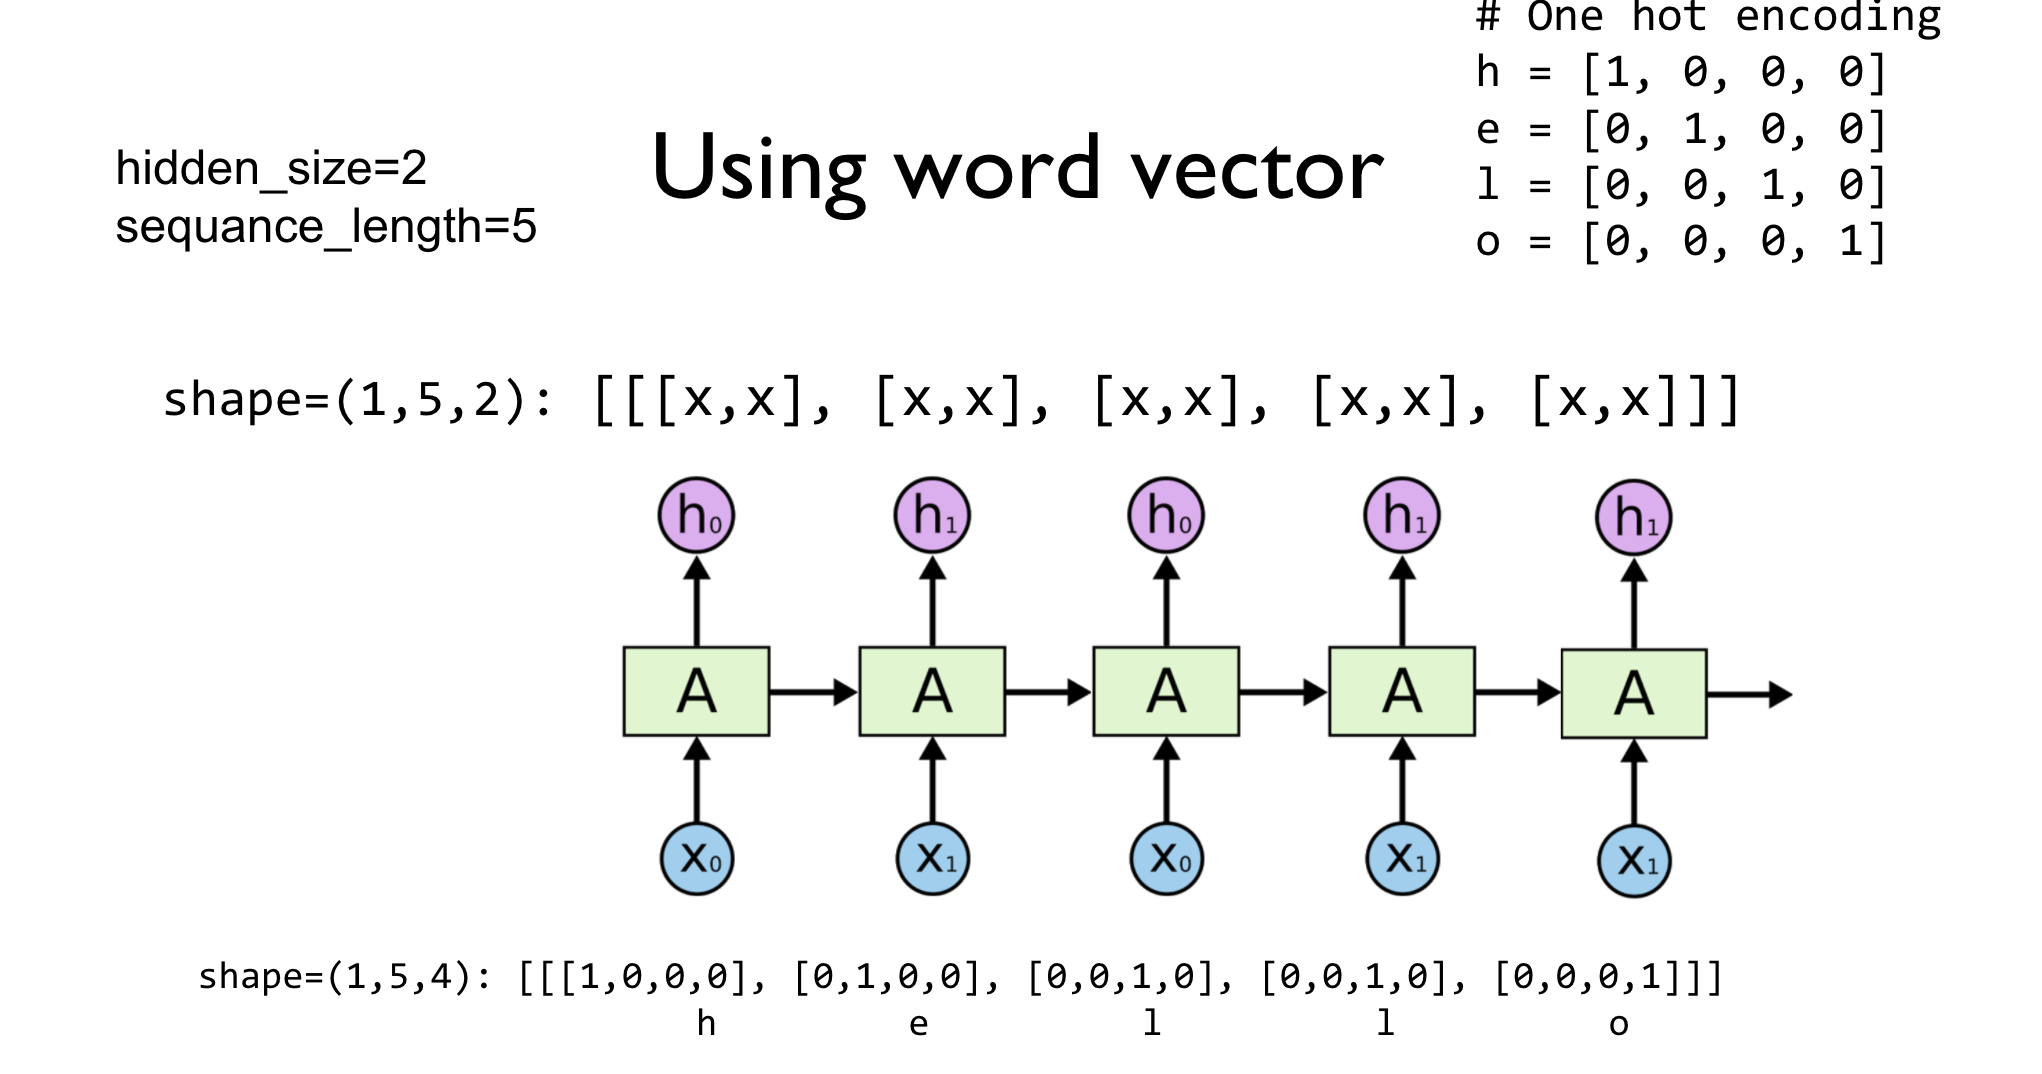

In [ ]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5
x_data = np.array([[h, e, l, l, o]], dtype=np.float32) #각각의 sequence 불러오고 RNN에 맞게 데이터 처리

hidden_size = 2  
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[ 0.43240735 -0.15534765]
  [ 0.42491886 -0.34627348]
  [-0.11716294 -0.29893994]
  [-0.5241708  -0.53133154]
  [-0.8161859   0.07364982]]], shape: (1, 5, 2) 

states: [[-0.8161859   0.07364982]], shape: (1, 2)


#### Batching input   
sequence가 5인 데이터 3개로 이루어진 mini batch
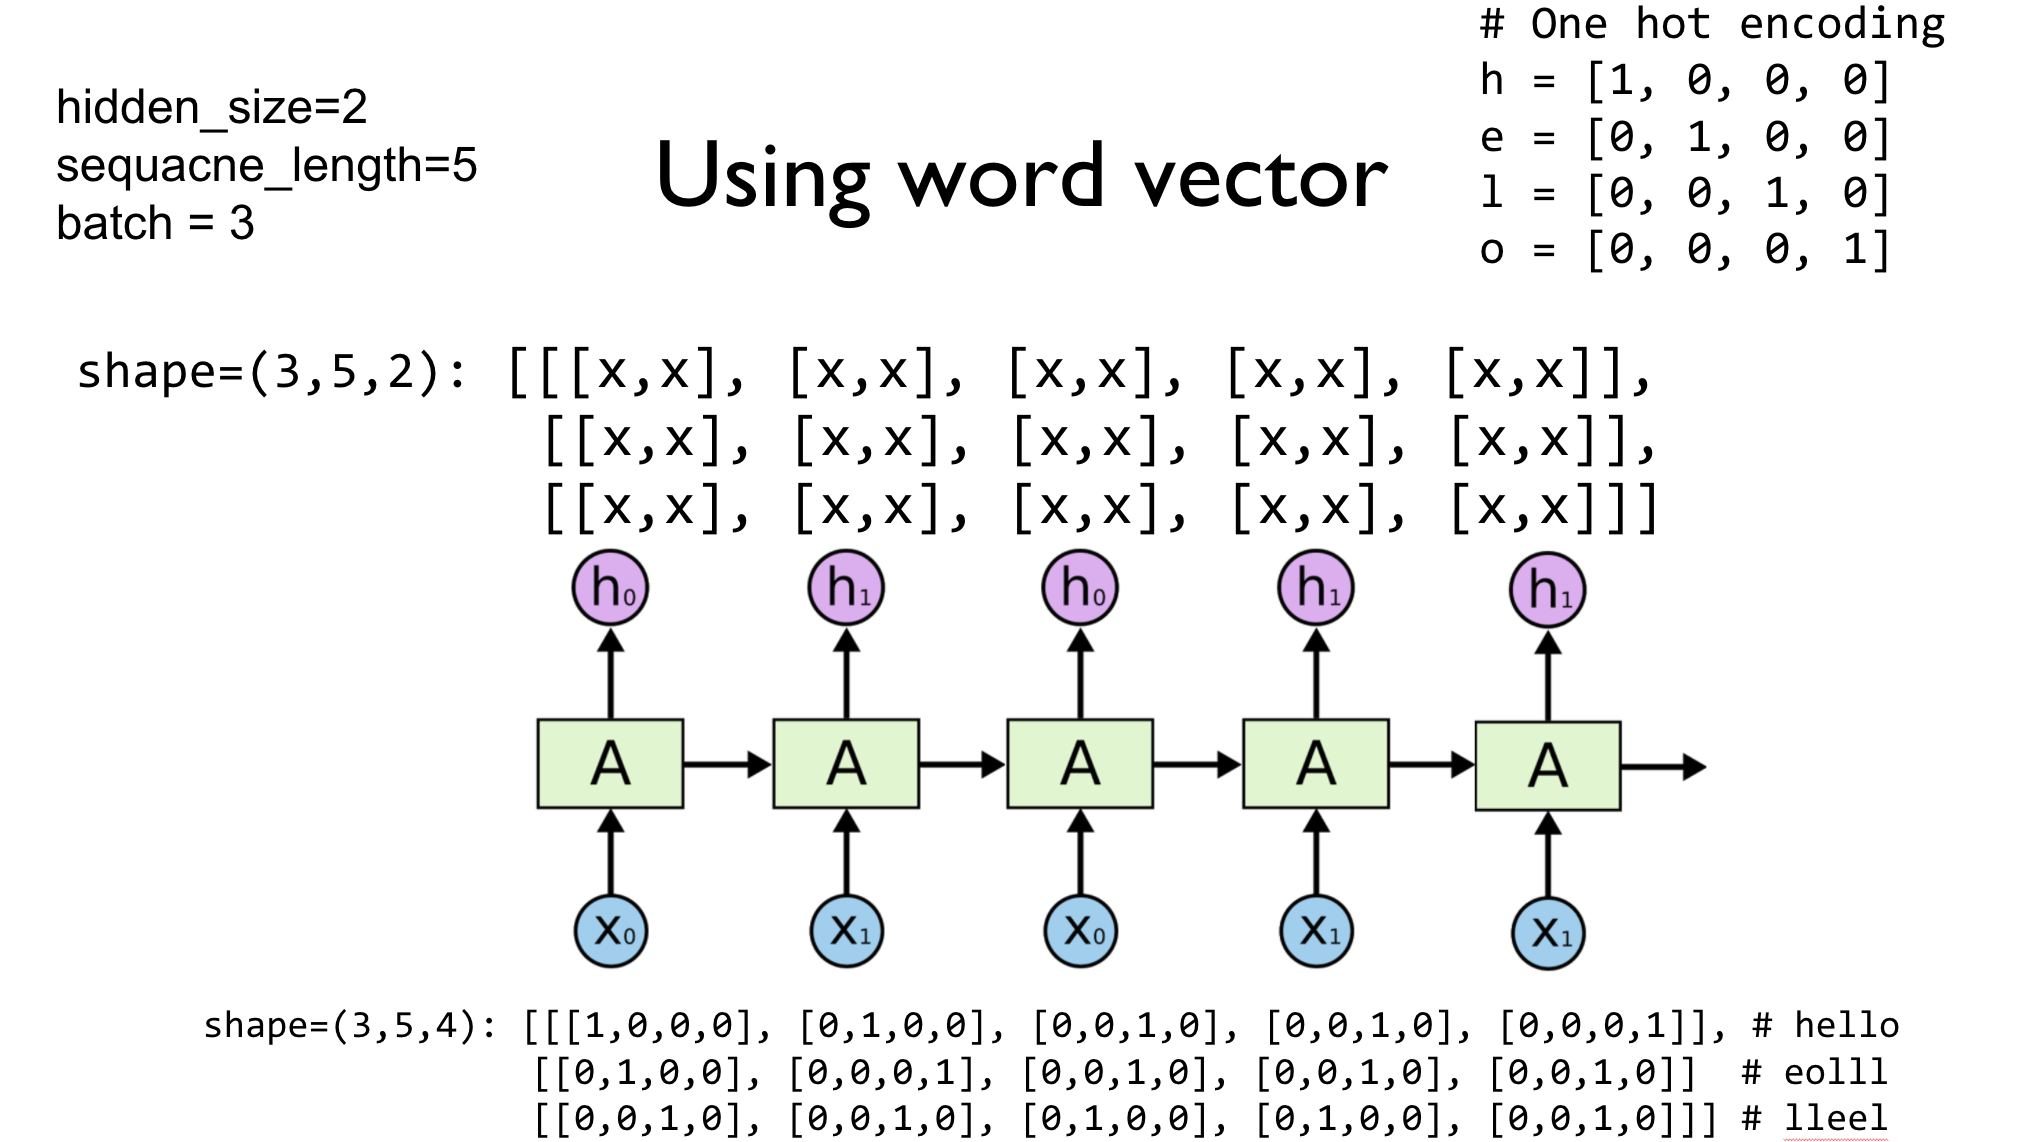

In [ ]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.4752303   0.2185087 ]
  [ 0.6758308   0.09838261]
  [-0.30968213 -0.6874027 ]
  [-0.8965217  -0.28473485]
  [ 0.07613819 -0.06275585]]

 [[ 0.39632353  0.40799317]
  [ 0.8507625  -0.73079807]
  [-0.7585626  -0.8760425 ]
  [-0.9486399   0.03077337]
  [-0.7938945   0.53234285]]

 [[-0.6046609  -0.26893997]
  [-0.8348427   0.15259604]
  [ 0.19435176  0.8489022 ]
  [ 0.853522    0.55391943]
  [ 0.1658851  -0.6678427 ]]], shape: (3, 5, 2) 

states: [[ 0.07613819 -0.06275585]
 [-0.7938945   0.53234285]
 [ 0.1658851  -0.6678427 ]], shape: (3, 2)
